In [1]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

## Vivienda

In [2]:
file = "../../data/enoe/2015trim1_csv/sdemt115.CSV"

In [4]:
df = pd.read_csv(file, encoding='latin')

C:\Users\aniit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,30,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(404432, 104)

In [6]:
df_copy=df.copy()

## Check NA

In [7]:
df_copy.isnull().any().any()

True

In [8]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [9]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

In [10]:
for column in df_copy.columns:
    print(column, ': ', df_copy[column].unique())

r_def :  [ 0 15]
loc :  [   1   20   11   17   21   26  152   27    3    9   15   25   14   68
   19   71    7    4    5   98   42   45   13   40   37   69   10  111
   48   43  424  180   35   93  105  212  224  131  190    8   31    2
  232  359   12  218  221  194  975  458  703  264   84   75  122   29
  217   60  231   87   61  223  222  157  230  181 1025   23  245   86
  114  108  132  155   58   49   79   44   38   72   32   59   83   51
   24   70   34   53   62   55   47    6   50   82   41   88   63  112
  127   65  160   16  622 1599  187 1053   28  125   30  102  142  101
   92  107   18  286   78  109  133  147  119   96  126   99  134  139
  141   95  128  124   54  146  106  123  135  113  120   90  121  116
  136  140   94  822  284  381  185 1781 1624  753  785  843  151   46
   77  138  312  311  214 2183 1883 1856  723 1107  268  280  247  304
  952  199  169  288  110  165  777  831  833  853  175   73  443  186
  388  211  439  746  341  403   66  176  291  170  2

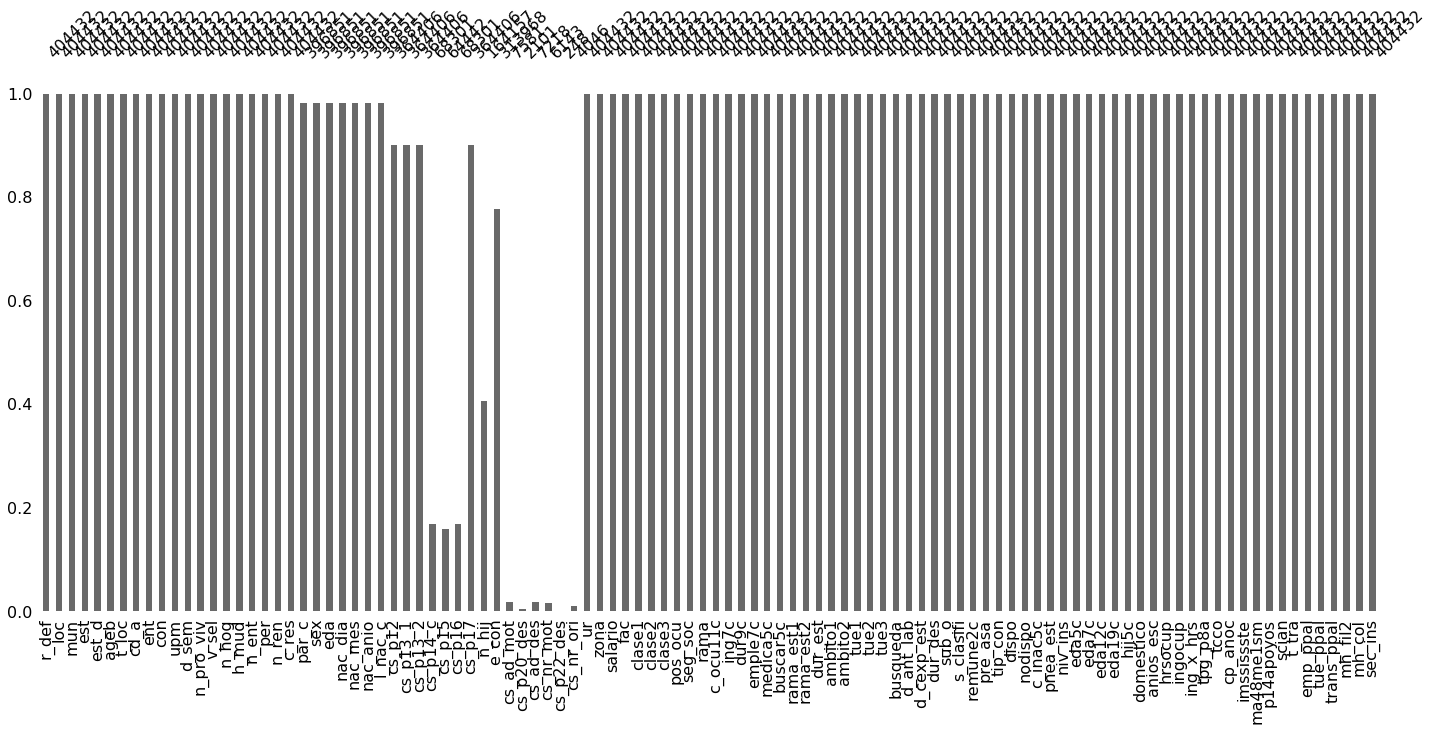

In [11]:
msno.bar(df_copy)

In [12]:
df_copy.fillna(value=-1, inplace=True)

In [13]:
threshold = round(df_copy.shape[0]*.75)
threshold

303324

In [14]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [15]:
len(l)

10

In [16]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [17]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

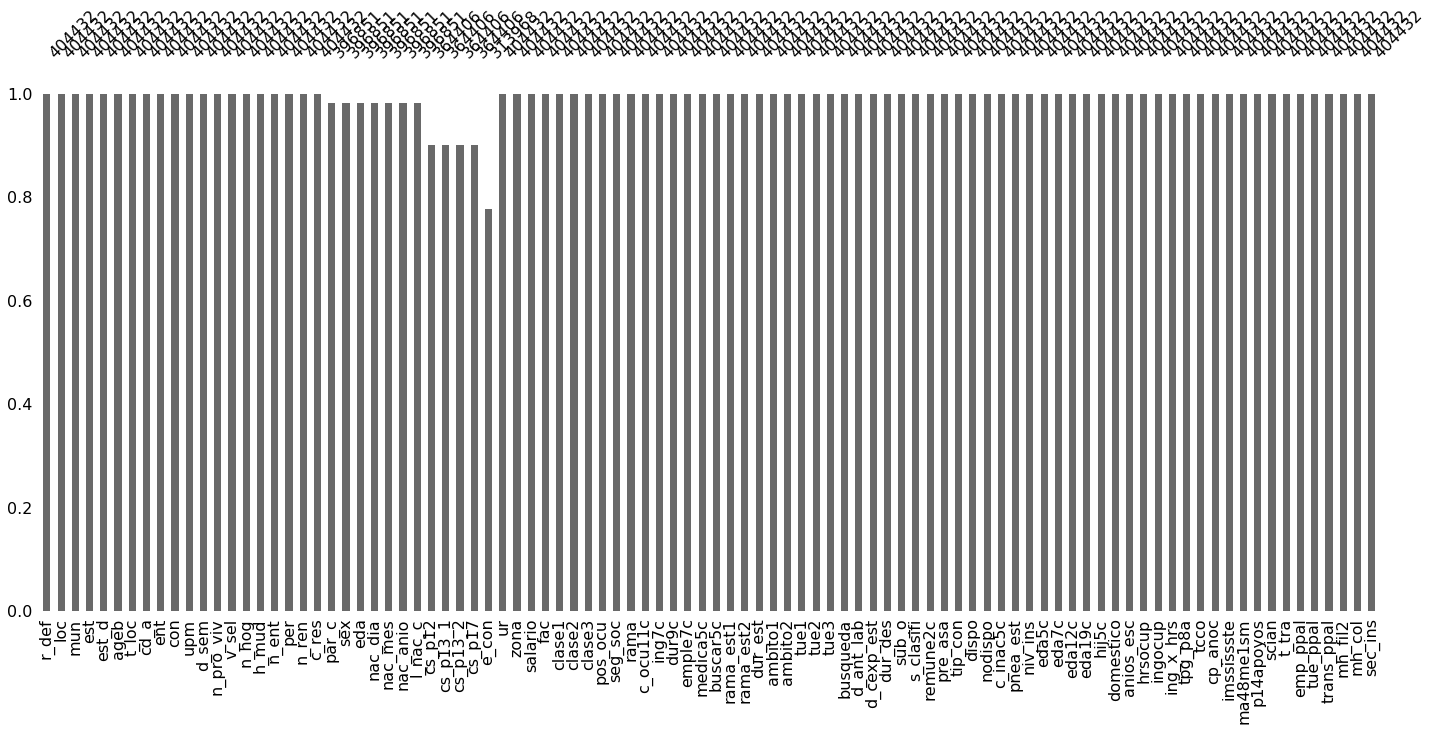

In [18]:
msno.bar(df_copy)

In [19]:
df_copy.isnull().any().any()

True

In [20]:
df_copy.dropna(inplace=True)

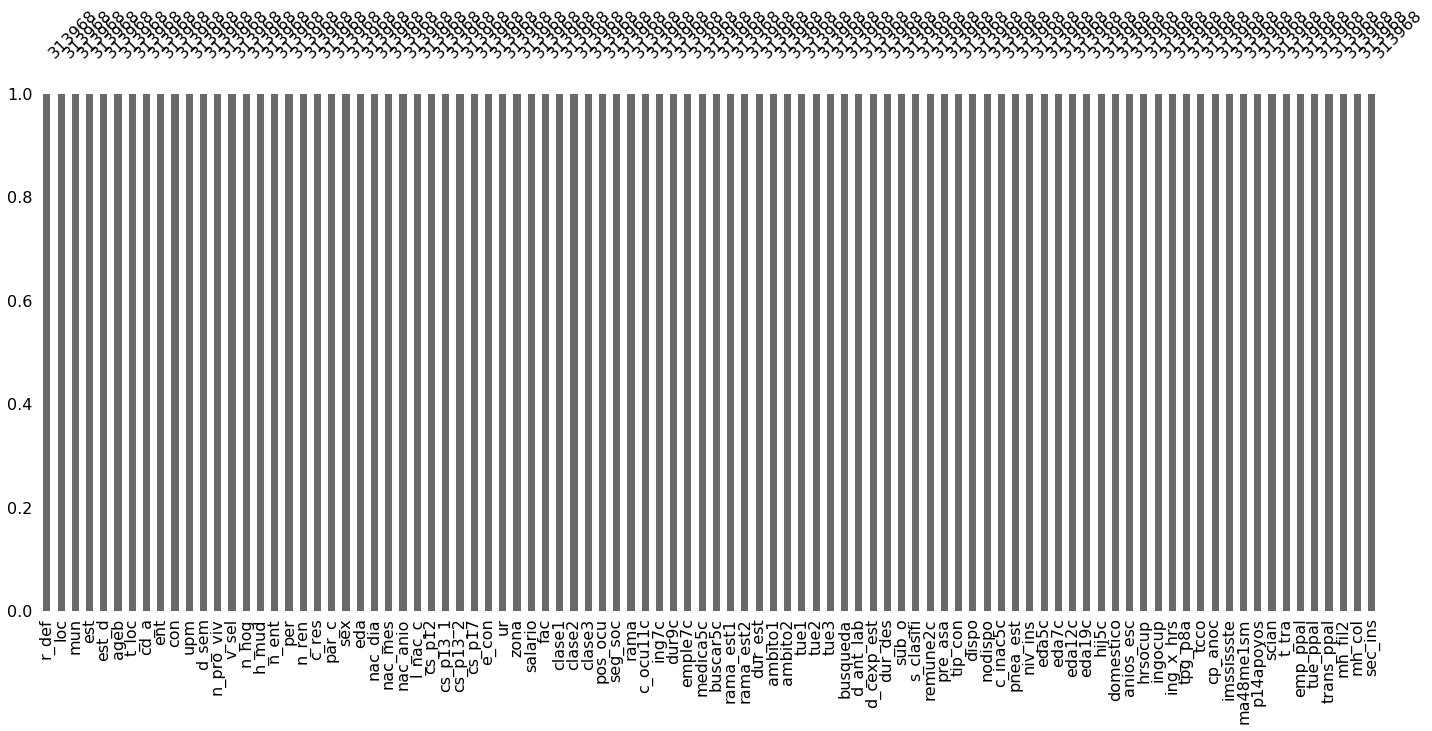

In [21]:
msno.bar(df_copy)

In [22]:
df_copy.isnull().any().any()

False

In [23]:
df_copy.shape

(313968, 94)

In [26]:
file = "../../dataframes/enoe/enoe_clean_2016.csv"

In [27]:
df_copy.to_csv(file)